In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('amravati_aqi.csv')
df.head()

,location_id,datetimeUtc,pm2.5,pm10,o3,no2,so2,co,temperature,humidity,AQI
0,5408,2025-05-01 00:15:00+00:00,19.0,28.0,4.1,35.9,10.0,970.0,22.9,84.0,48
1,5408,2025-05-01 00:30:00+00:00,19.0,28.0,5.5,36.1,9.5,890.0,23.2,83.0,45
2,5408,2025-05-01 00:45:00+00:00,19.0,28.0,8.0,36.0,9.2,1030.0,23.4,83.0,45
3,5408,2025-05-01 01:00:00+00:00,19.0,28.0,8.4,34.6,8.9,1060.0,23.5,82.0,43
4,5408,2025-05-01 01:30:00+00:00,17.0,23.0,15.3,35.2,8.9,920.0,23.9,78.0,46


In [4]:
df.shape

(1016, 11)

In [5]:
df.fillna(method='ffill', inplace=True)

C:\Users\rajir\AppData\Local\Temp\ipykernel_13776\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [6]:
df.isnull().sum()

location_id    0
datetimeUtc    0
pm2.5          0
pm10           0
o3             0
no2            0
so2            0
co             0
temperature    0
humidity       0
AQI            0
dtype: int64

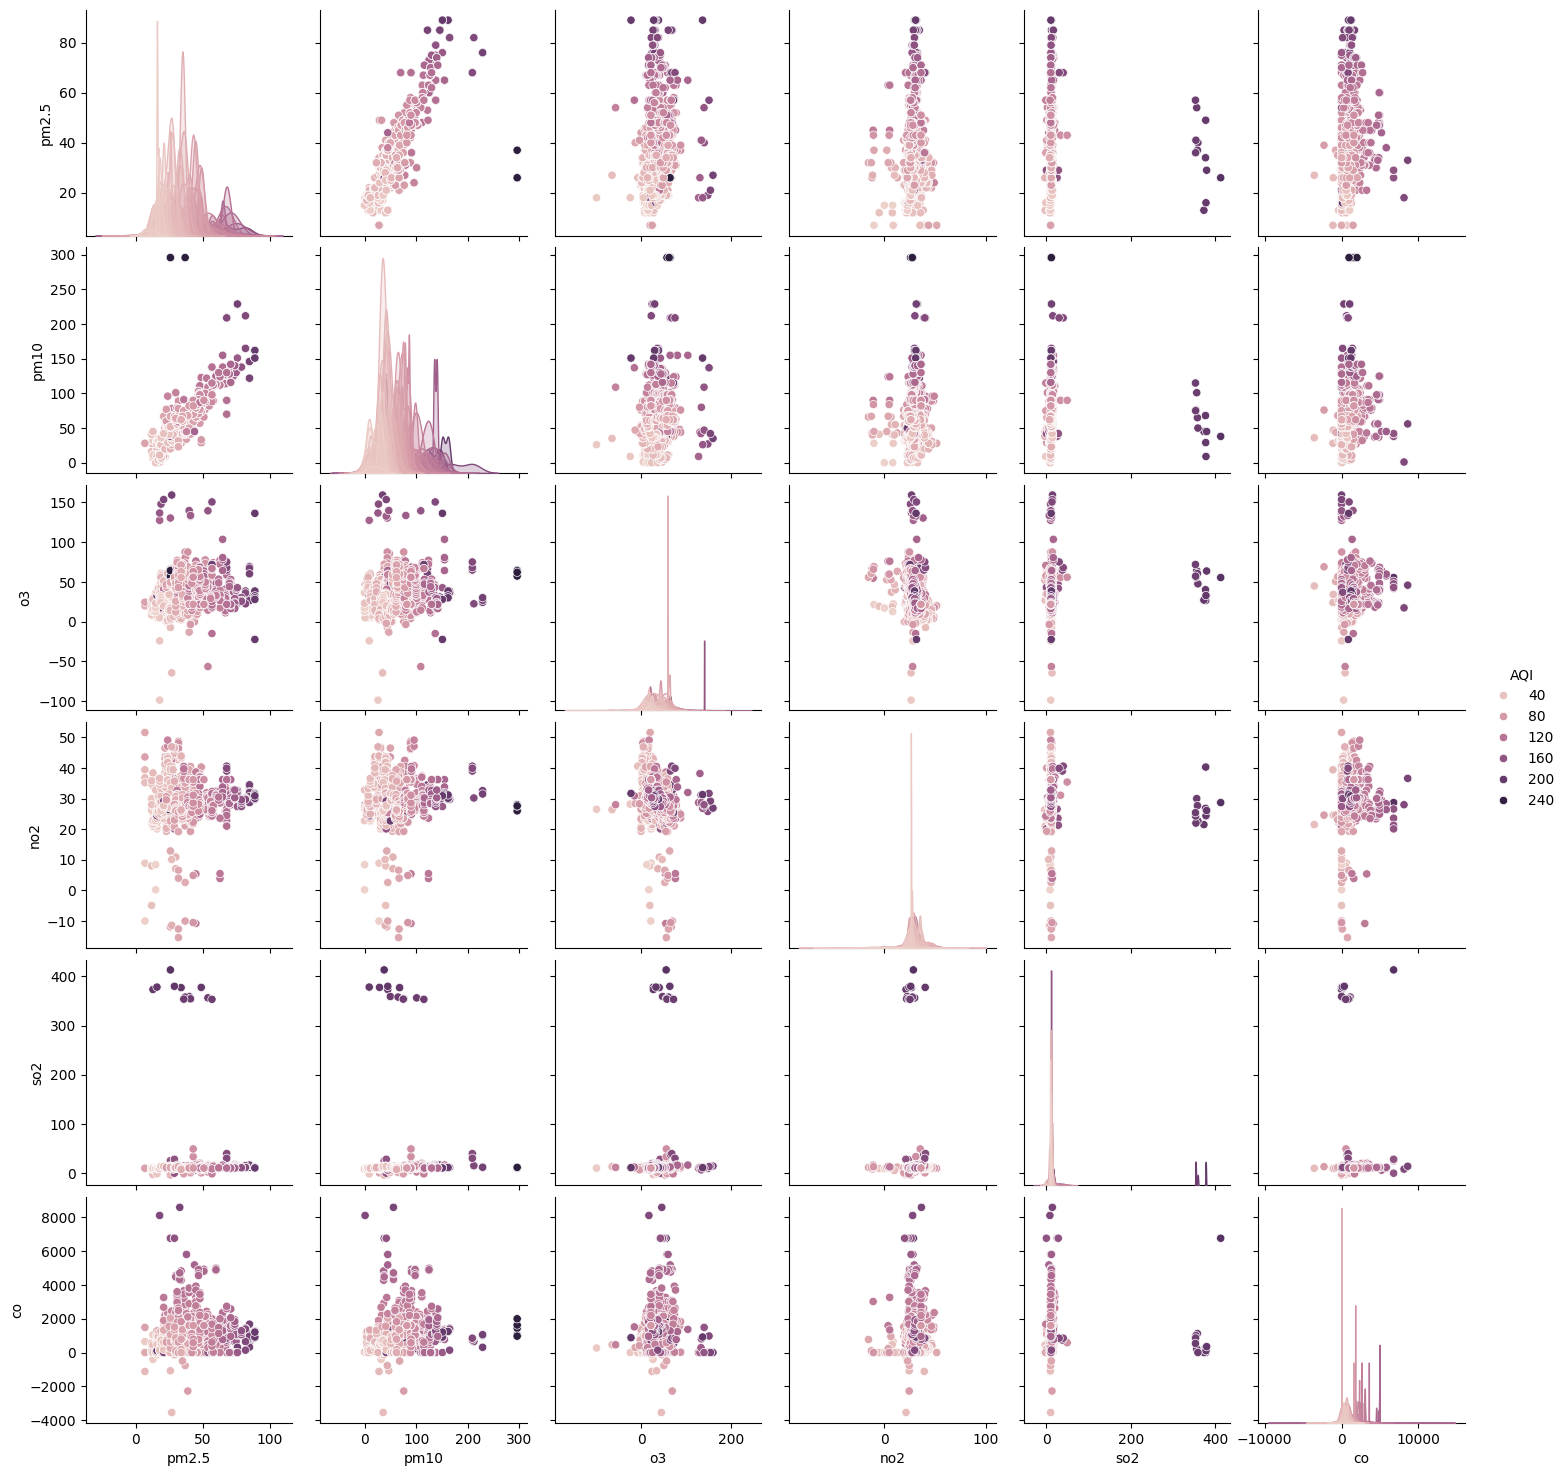

In [7]:
import seaborn as sns
sns.pairplot(df,vars=['pm2.5',	'pm10'	,'o3'	,'no2'	,'so2',	'co'], hue='AQI')

In [119]:
from sklearn.model_selection import train_test_split
x=df.drop(['location_id','datetimeUtc','AQI'], axis=1)
y=df['AQI']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
from sklearn.linear_model import LinearRegression

In [120]:
model= LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
model.score(x_test, y_test)

0.8501564931952639

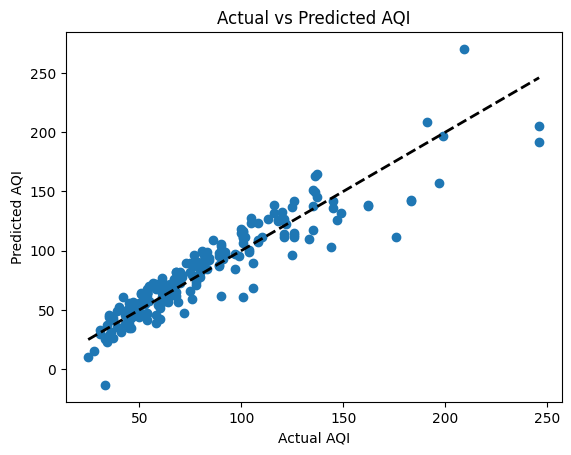

In [121]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.show()

In [122]:
x.head()

,pm2.5,pm10,o3,no2,so2,co,temperature,humidity
0,19.0,28.0,4.1,35.9,10.0,970.0,22.9,84.0
1,19.0,28.0,5.5,36.1,9.5,890.0,23.2,83.0
2,19.0,28.0,8.0,36.0,9.2,1030.0,23.4,83.0
3,19.0,28.0,8.4,34.6,8.9,1060.0,23.5,82.0
4,17.0,23.0,15.3,35.2,8.9,920.0,23.9,78.0


In [123]:
model.predict([[25,80,18.8,26.1,11.5,260,32,46]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([58.94835785])

In [124]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)
rf_model.score(x_test, y_test)


0.9849416124578361

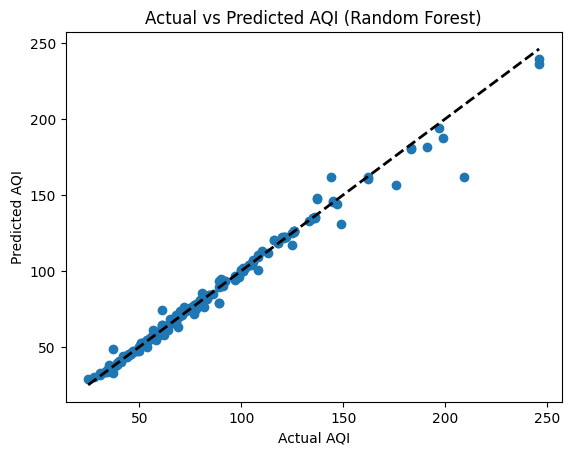

In [125]:
plt.scatter(y_test, rf_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI (Random Forest)')
plt.show()

In [126]:
rf_model.predict([[25,80,18.8,26.1,11.5,260,32,46]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([74.34])

In [127]:
import prophet

In [128]:
df

,location_id,datetimeUtc,pm2.5,pm10,o3,no2,so2,co,temperature,humidity,AQI
0,5408,2025-05-01 00:15:00+00:00,19.0,28.0,4.1,35.9,10.0,970.0,22.9,84.0,48
1,5408,2025-05-01 00:30:00+00:00,19.0,28.0,5.5,36.1,9.5,890.0,23.2,83.0,45
2,5408,2025-05-01 00:45:00+00:00,19.0,28.0,8.0,36.0,9.2,1030.0,23.4,83.0,45
3,5408,2025-05-01 01:00:00+00:00,19.0,28.0,8.4,34.6,8.9,1060.0,23.5,82.0,43
4,5408,2025-05-01 01:30:00+00:00,17.0,23.0,15.3,35.2,8.9,920.0,23.9,78.0,46
...,...,...,...,...,...,...,...,...,...,...,...
1011,5408,2025-05-13 03:45:00+00:00,51.0,90.0,21.8,36.2,10.5,1600.0,24.9,82.0,90
1012,5408,2025-05-13 04:15:00+00:00,40.0,82.0,21.8,36.2,10.5,1600.0,24.9,82.0,82
1013,5408,2025-05-13 04:30:00+00:00,40.0,82.0,21.8,36.2,10.5,1600.0,24.9,82.0,82
1014,5408,2025-05-13 04:45:00+00:00,40.0,82.0,21.8,36.2,10.5,1600.0,24.9,82.0,82


In [129]:
df=df.drop(['location_id'],axis=1)

In [130]:
df

,datetimeUtc,pm2.5,pm10,o3,no2,so2,co,temperature,humidity,AQI
0,2025-05-01 00:15:00+00:00,19.0,28.0,4.1,35.9,10.0,970.0,22.9,84.0,48
1,2025-05-01 00:30:00+00:00,19.0,28.0,5.5,36.1,9.5,890.0,23.2,83.0,45
2,2025-05-01 00:45:00+00:00,19.0,28.0,8.0,36.0,9.2,1030.0,23.4,83.0,45
3,2025-05-01 01:00:00+00:00,19.0,28.0,8.4,34.6,8.9,1060.0,23.5,82.0,43
4,2025-05-01 01:30:00+00:00,17.0,23.0,15.3,35.2,8.9,920.0,23.9,78.0,46
...,...,...,...,...,...,...,...,...,...,...
1011,2025-05-13 03:45:00+00:00,51.0,90.0,21.8,36.2,10.5,1600.0,24.9,82.0,90
1012,2025-05-13 04:15:00+00:00,40.0,82.0,21.8,36.2,10.5,1600.0,24.9,82.0,82
1013,2025-05-13 04:30:00+00:00,40.0,82.0,21.8,36.2,10.5,1600.0,24.9,82.0,82
1014,2025-05-13 04:45:00+00:00,40.0,82.0,21.8,36.2,10.5,1600.0,24.9,82.0,82


In [131]:
data=pd.DataFrame()

In [132]:
type(df['datetimeUtc'][0])

str

In [133]:
df['datetimeUtc'] = pd.to_datetime(df['datetimeUtc'], utc=True)


In [134]:
df

,datetimeUtc,pm2.5,pm10,o3,no2,so2,co,temperature,humidity,AQI
0,2025-05-01 00:15:00+00:00,19.0,28.0,4.1,35.9,10.0,970.0,22.9,84.0,48
1,2025-05-01 00:30:00+00:00,19.0,28.0,5.5,36.1,9.5,890.0,23.2,83.0,45
2,2025-05-01 00:45:00+00:00,19.0,28.0,8.0,36.0,9.2,1030.0,23.4,83.0,45
3,2025-05-01 01:00:00+00:00,19.0,28.0,8.4,34.6,8.9,1060.0,23.5,82.0,43
4,2025-05-01 01:30:00+00:00,17.0,23.0,15.3,35.2,8.9,920.0,23.9,78.0,46
...,...,...,...,...,...,...,...,...,...,...
1011,2025-05-13 03:45:00+00:00,51.0,90.0,21.8,36.2,10.5,1600.0,24.9,82.0,90
1012,2025-05-13 04:15:00+00:00,40.0,82.0,21.8,36.2,10.5,1600.0,24.9,82.0,82
1013,2025-05-13 04:30:00+00:00,40.0,82.0,21.8,36.2,10.5,1600.0,24.9,82.0,82
1014,2025-05-13 04:45:00+00:00,40.0,82.0,21.8,36.2,10.5,1600.0,24.9,82.0,82


In [135]:
df['datetimeUtc'] = pd.to_datetime(df['datetimeUtc'])
df.set_index('datetimeUtc', inplace=True)
df_resampled = df.resample('15T').ffill().reset_index()
df_resampled

<ipython-input-135-c9cae45b9d58>:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df.resample('15T').ffill().reset_index()


,datetimeUtc,pm2.5,pm10,o3,no2,so2,co,temperature,humidity,AQI
0,2025-05-01 00:15:00+00:00,19.0,28.0,4.1,35.9,10.0,970.0,22.9,84.0,48
1,2025-05-01 00:30:00+00:00,19.0,28.0,5.5,36.1,9.5,890.0,23.2,83.0,45
2,2025-05-01 00:45:00+00:00,19.0,28.0,8.0,36.0,9.2,1030.0,23.4,83.0,45
3,2025-05-01 01:00:00+00:00,19.0,28.0,8.4,34.6,8.9,1060.0,23.5,82.0,43
4,2025-05-01 01:15:00+00:00,19.0,28.0,8.4,34.6,8.9,1060.0,23.5,82.0,43
...,...,...,...,...,...,...,...,...,...,...
1170,2025-05-13 04:45:00+00:00,40.0,82.0,21.8,36.2,10.5,1600.0,24.9,82.0,82
1171,2025-05-13 05:00:00+00:00,40.0,82.0,21.8,36.2,10.5,1600.0,24.9,82.0,82
1172,2025-05-13 05:15:00+00:00,40.0,82.0,21.8,36.2,10.5,1600.0,24.9,82.0,82
1173,2025-05-13 05:30:00+00:00,40.0,82.0,21.8,36.2,10.5,1600.0,24.9,82.0,82


In [136]:
df_resampled['datetimeUtc'] = df_resampled['datetimeUtc'].dt.tz_localize(None)
df_resampled['datetimeUtc']


,datetimeUtc
0,2025-05-01 00:15:00
1,2025-05-01 00:30:00
2,2025-05-01 00:45:00
3,2025-05-01 01:00:00
4,2025-05-01 01:15:00
...,...
1170,2025-05-13 04:45:00
1171,2025-05-13 05:00:00
1172,2025-05-13 05:15:00
1173,2025-05-13 05:30:00


In [138]:
from prophet import Prophet

df_prophet = df_resampled[['datetimeUtc', 'AQI']].rename(columns={'datetimeUtc': 'ds', 'AQI': 'y'})

model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=200, freq='15min')
forecast = model.predict(future)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6oh0csm9/pd6d4x6j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6oh0csm9/7upyqx28.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48683', 'data', 'file=/tmp/tmp6oh0csm9/pd6d4x6j.json', 'init=/tmp/tmp6oh0csm9/7upyqx28.json', 'output', 'file=/tmp/tmp6oh0csm9/prophet_model4mg9mzpn/prophet_model-20250604025632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:56:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:56:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [139]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2025-05-01 00:15:00,55.804854,8.036144,84.782830,55.804854,55.804854,-10.044608,-10.044608,-10.044608,-10.044608,-10.044608,-10.044608,0.0,0.0,0.0,45.760246
1,2025-05-01 00:30:00,55.829778,6.942073,86.288650,55.829778,55.829778,-10.603552,-10.603552,-10.603552,-10.603552,-10.603552,-10.603552,0.0,0.0,0.0,45.226226
2,2025-05-01 00:45:00,55.854703,8.577029,83.184977,55.854703,55.854703,-11.206323,-11.206323,-11.206323,-11.206323,-11.206323,-11.206323,0.0,0.0,0.0,44.648380
3,2025-05-01 01:00:00,55.879627,4.159527,86.233252,55.879627,55.879627,-11.865920,-11.865920,-11.865920,-11.865920,-11.865920,-11.865920,0.0,0.0,0.0,44.013707
4,2025-05-01 01:15:00,55.904551,5.920146,82.573866,55.904551,55.904551,-12.589609,-12.589609,-12.589609,-12.589609,-12.589609,-12.589609,0.0,0.0,0.0,43.314942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,2025-05-15 06:45:00,163.767401,121.798575,200.935706,162.098102,165.649880,-2.343882,-2.343882,-2.343882,-2.343882,-2.343882,-2.343882,0.0,0.0,0.0,161.423519
1371,2025-05-15 07:00:00,163.907671,125.046705,202.074273,162.226225,165.806979,0.179884,0.179884,0.179884,0.179884,0.179884,0.179884,0.0,0.0,0.0,164.087554
1372,2025-05-15 07:15:00,164.047940,127.033343,202.512560,162.354347,165.964639,2.636935,2.636935,2.636935,2.636935,2.636935,2.636935,0.0,0.0,0.0,166.684875
1373,2025-05-15 07:30:00,164.188209,128.518725,205.874180,162.468892,166.119462,4.971894,4.971894,4.971894,4.971894,4.971894,4.971894,0.0,0.0,0.0,169.160103


In [140]:
last_date = df_prophet['ds'].max()
future_predictions = forecast[forecast['ds'] > last_date][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(future_predictions)


                      ds        yhat  yhat_lower  yhat_upper
1175 2025-05-13 06:00:00  126.686467   88.433721  168.148238
1176 2025-05-13 06:15:00  129.198515   90.489377  169.896438
1177 2025-05-13 06:30:00  131.819567   97.743665  168.328196
1178 2025-05-13 06:45:00  134.491793   97.028982  172.662402
1179 2025-05-13 07:00:00  137.155829   98.944654  175.733620
...                  ...         ...         ...         ...
1370 2025-05-15 06:45:00  161.423519  121.798575  200.935706
1371 2025-05-15 07:00:00  164.087554  125.046705  202.074273
1372 2025-05-15 07:15:00  166.684875  127.033343  202.512560
1373 2025-05-15 07:30:00  169.160103  128.518725  205.874180
1374 2025-05-15 07:45:00  171.463118  133.088298  207.143387

[200 rows x 4 columns]


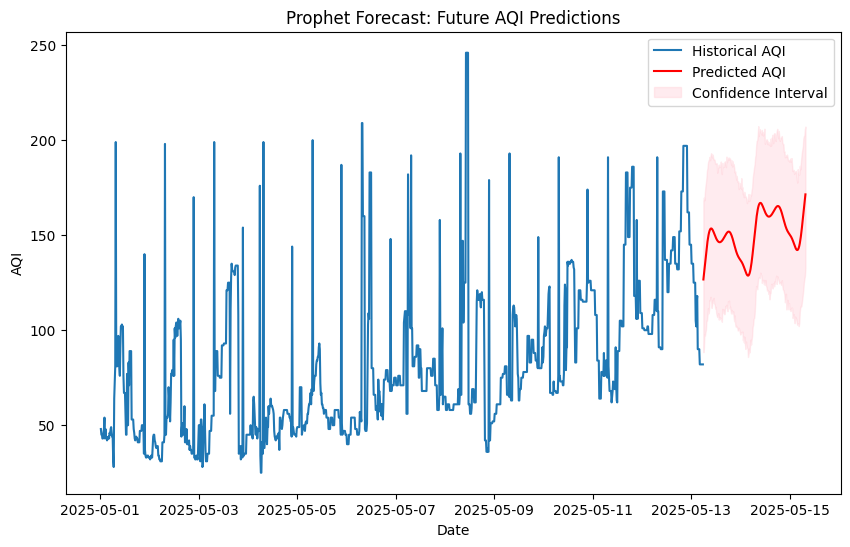

In [141]:
import matplotlib.pyplot as plt
last_date = df_prophet['ds'].max()
future_predictions = forecast[forecast['ds'] > last_date]

plt.figure(figsize=(10,6))

plt.plot(df_prophet['ds'], df_prophet['y'], label='Historical AQI')

plt.plot(future_predictions['ds'], future_predictions['yhat'], label='Predicted AQI', color='red')

plt.fill_between(future_predictions['ds'],
                 future_predictions['yhat_lower'],
                 future_predictions['yhat_upper'],
                 color='pink', alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Prophet Forecast: Future AQI Predictions')
plt.legend()
plt.show()


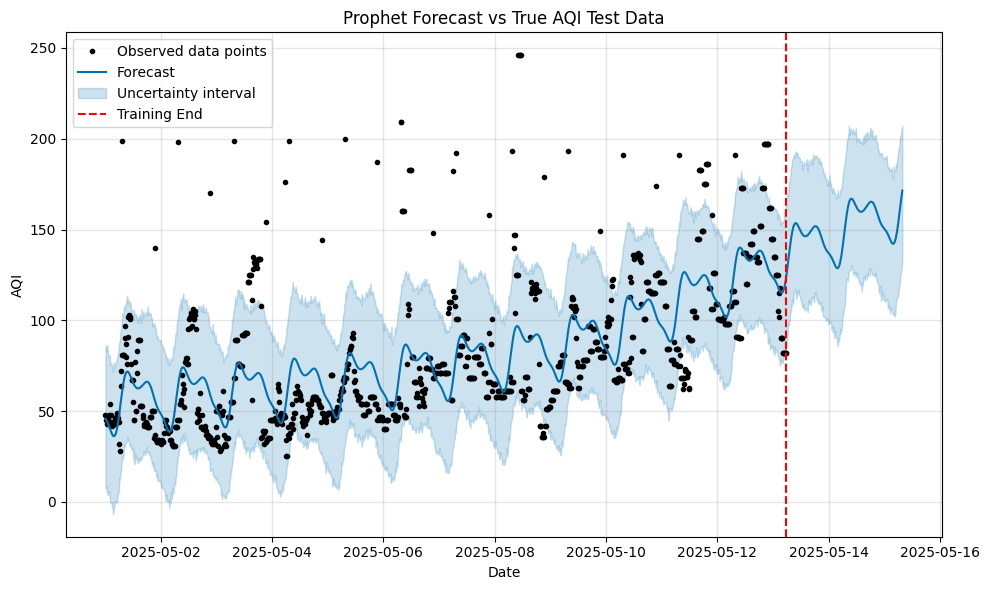

In [151]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd
df_resampled['datetimeUtc'] = pd.to_datetime(df_resampled['datetimeUtc'])
forecast_plot = model.plot(forecast)
axes = forecast_plot.gca()
last_training_date = df_prophet['ds'].max()
axes.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')
plt.legend()
plt.title("Prophet Forecast vs True AQI Test Data")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.tight_layout()

plt.show()
